# **INSTALLING** **WORKING** **LIBRARIES**

In [ ]:
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install collection

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for collection: filename=collection-0.1.6-py3-none-any.whl size=5114 sha256=c257729de24e91565afdc735e127de7b89b31a5f03caa32f9331bc72c45953fe
  Stored in directory: /root/.cache/pip/wheels/45/ed/3c/29a1c0600bb908a2e7421dc3a3775cbaed434a71b4ed93a439
Successfully built collection


In [ ]:
pip install scikit-image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install os-sys

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.6 MB 5.0 MB/s 
     |████████████████████████████████| 89 kB 7.9 MB/s 
     |████████████████████████████████| 5.2 MB 47.2 MB/s 
     |████████████████████████████████| 265 kB 65.9 MB/s 
     |████████████████████████████████| 7.9 MB 10.2 MB/s 
     |████████████████████████████████| 209 kB 72.8 MB/s 
     |████████████████████████████████| 11.9 MB 65.9 MB/s 
     |████████████████████████████████| 102 kB 10.0 MB/s 
     |████████████████████████████████| 79.6 MB 1.2 MB/s 
     |████████████████████████████████| 225 kB 47.1 MB/s 
     |████████████████████████████████| 10.2 MB 45.6 MB/s 
     |████████████████████████████████| 98 kB 8.2 MB/s 
     |████████████████████████████████| 1.3 MB 54.4 MB/s 
     |████████████████████████████████| 15.5 MB 75.0 MB/s 
     |████████████████████████████████| 15.4 MB 4.4 MB/s 
     |██████████████████████████

# **COLOR** **DETECTION** **MODEL**:

---



In [ ]:
#Importing working Libraries
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
from google.colab import files

%matplotlib inline

The type of this input is <class 'numpy.ndarray'>
Shape: (1280, 1920, 3)


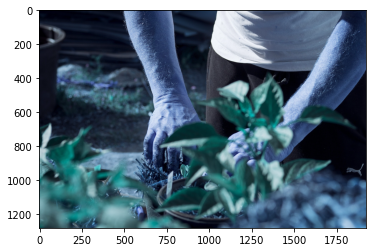

In [ ]:
#Reading images
image=cv2.imread("/content/garden-g6a993636a_1920.jpg",1)

#Type of the image
print("The type of this input is {}".format(type(image)))

#shape of the image
print("Shape: {}".format(image.shape))

plt.imshow(image)

In [ ]:
#image is off color becase Cv2 is reading image in a sequence of BGR by default 

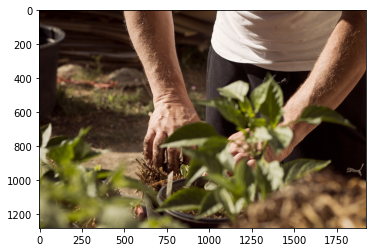

In [ ]:
#Coverting the image into RGB format
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

plt.imshow(image)

In [ ]:
#Converting the color into hex code
#Making conversion function
def RGB2HEX(color):
  return ("#{:02x}{:02x}{:02x}".format(int(color[0]),int(color[1]),int(color[2])))

In [ ]:
#making function that will covert the new image into the RGB format
def get_image(image_path):
  image=cv2.imread(image_path)
  image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  return image

# CREATING A COLOR DETECTION METHOD:

In [ ]:
#image: the image you input using get_image() fuction that we created.
#num_of_color: Int value of number of colors we want to show on the pie chart
#showchart: It will be a bool value True:will show the pie chart, False: will not show the pie chart

def get_color(image,number_of_colors,showchart):

  #Resizing the image to reduce the time
  resized_img=cv2.resize(image,(600,400),interpolation=cv2.INTER_AREA)
  #A we will be using kmean clustering it accept the input in 2d form this purpose we used numpy rehape function to convert
  resized_img=resized_img.reshape(resized_img.shape[0]*resized_img.shape[1],3)

  #############################################################

  #using Kmean clustering to form the color clusters
  clf=KMeans(n_clusters=number_of_colors)
  #Fitting to the resized image.
  labels=clf.fit_predict(resized_img)

  ##############################################################

  #Getting the count of all the cluster color labels and plotting them on pie chart.
  counts=Counter(labels)
  #Center of the cluster
  center_colors=clf.cluster_centers_

  #Getting the order of the by iterating over the keys present in count
  color_orders=[center_colors[i] for i in counts.keys()]

  #converting in to hex codes using the hexa conversion function that we made. we will plot the labels on the pie chart
  hex_color=[RGB2HEX(color_orders[i]) for i in counts.keys()]

  #Loading the colors to plot on the pie chart
  rgb_color=[color_orders[i] for i in counts.keys()]

  #If the show chart will be true the chart will be plotted
  if (showchart):
    plt.figure(figsize=(8,6))
    plt.pie(counts.values(),labels=hex_color,colors=hex_color)


  return rgb_color




  

# IMAGE 1 COLOR DETECTION :

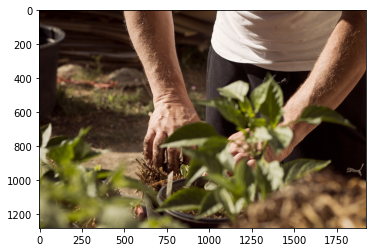

In [ ]:
#Reading images
image=cv2.imread("/content/garden-g6a993636a_1920.jpg",1)
#Coverting the image into RGB format
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

plt.imshow(image)

[array([22.67081532, 10.54958076,  7.01342538]),
 array([183.77847019, 157.99895219, 117.30226659]),
 array([147.73801196, 125.10852156,  81.44608244]),
 array([241.07847502, 230.73493808, 224.43300404]),
 array([118.91647828,  96.30934058,  59.58520514]),
 array([86.86528559, 68.05661772, 38.85870602]),
 array([56.2360225 , 40.9606518 , 21.71304715]),
 array([218.69787793, 194.39743309, 168.16269234])]

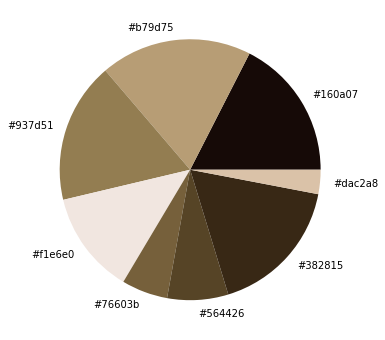

In [ ]:
#Detecting dominent colors of image.
get_color(get_image("/content/garden-g6a993636a_1920.jpg"),8,True)

# **IMAGE** **2** **COLOR** **DETECTION**:

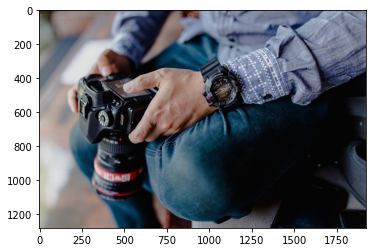

In [ ]:
#Reading images
image=cv2.imread("/content/gear-gbf86d5f0a_1920.jpg",1)
#Coverting the image into RGB format
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

plt.imshow(image)

[array([ 76.74788634,  93.14884623, 112.70653487]),
 array([ 7.9433677 ,  9.193602  , 12.67646361]),
 array([131.37630952, 125.47444444, 131.27498016]),
 array([203.95256519, 203.59328329, 205.56728314]),
 array([26.04604346, 51.23181832, 71.10714815]),
 array([155.42007565, 156.05212803, 167.15886335])]

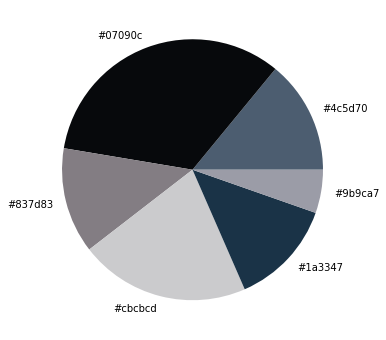

In [ ]:
#Detecting dominent colors of image.
get_color(get_image("/content/gear-gbf86d5f0a_1920.jpg"),6,True)

# **IMAGE** **3** **COLOR** **DETECTION**:

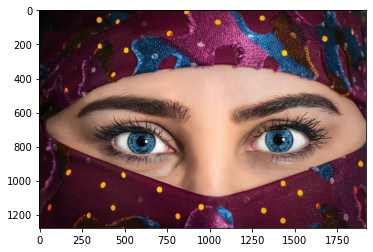

In [ ]:
#Reading images
image=cv2.imread("/content/model-gc98a8954e_1920.jpg",1)
#Coverting the image into RGB format
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

plt.imshow(image)

[array([95.89521964, 38.52997416, 57.80507106]),
 array([236.58812678, 194.17341254, 173.80112903]),
 array([66.33397358, 19.74159905, 36.20697207]),
 array([205.46672309, 157.6706163 , 138.00346234]),
 array([ 54.90901076, 108.7513666 , 152.22800212]),
 array([130.48073311,  80.22455196,  81.61151444]),
 array([230.96725146, 168.95380117,  12.44795322]),
 array([171.0193115 , 120.21930101, 110.76752729]),
 array([22.96617336, 48.63750881, 73.70516209]),
 array([32.71246111, 12.67865915, 17.9464081 ])]

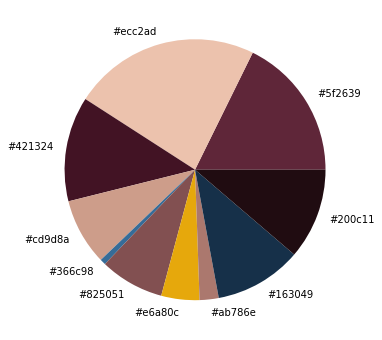

In [ ]:
#Detecting dominent colors of image.
get_color(get_image("/content/model-gc98a8954e_1920.jpg"),10,True)